In [8]:
import physics
import numpy as np
import matplotlib.pyplot as plt

In [9]:
bs_config = {
  "panel_efficiency": 0.2432,
  "panel_size": 4.0,

  "max_voltage": 134.4,
  "min_voltage": 86.4,
  "num_cells_per_module": 13,
  "num_modules": 32,
  "cell_charge_rating": 3300,
  "max_current_capacity": 48.9,
  "max_energy_capacity": 5400,

  "lvs_voltage": 12,
  "lvs_current": 1.50,

  "vehicle_mass": 350,
  "road_friction": 0.012,
  "tire_radius": 0.2032,
  "vehicle_frontal_area": 1.1853,
  "drag_coefficient": 0.11609,

  "max_acceleration_kmh_per_s": 6,
  "max_deceleration_kmh_per_s": 6,

  "max_speed_during_turn": 20,
  "max_cruising_speed": 80
}

motormodel = physics.motor.BasicMotor(
    bs_config['vehicle_mass'],
    bs_config['road_friction'],
    bs_config['tire_radius'],
    bs_config['vehicle_frontal_area'],
    bs_config['drag_coefficient'])

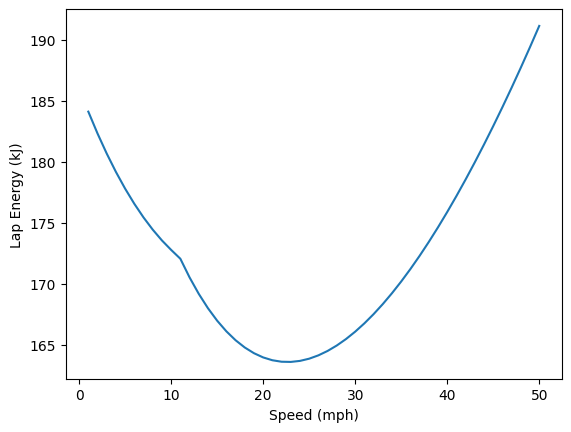

In [60]:
fsgp_len_mi = 3.0
seconds_per_hour = 3600

arr_of = lambda speed_mph, length=1000: np.ones(length) * speed_mph

speeds_mph = range(1, 51)
avg_lap_energies_kj = []
for mph in speeds_mph:
    speeds = arr_of(mph)
    winds = arr_of(0)
    grads = arr_of(0)
    power_arr = motormodel.calculate_energy_in(speeds, grads, winds, 1)
    mean_power = np.mean(power_arr)
    lap_time_taken = fsgp_len_mi / mph * seconds_per_hour
    avg_lap_energies_kj.append(mean_power * lap_time_taken / 1000)

plt.plot(speeds_mph, avg_lap_energies_kj)
plt.ylabel('Lap Energy (kJ)')
plt.xlabel('Speed (mph)')
plt.show()

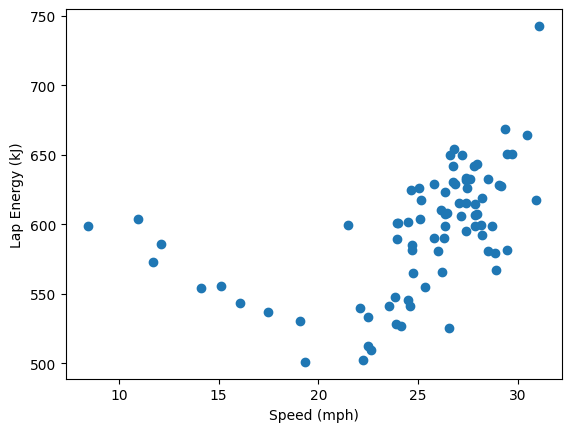

In [61]:
import pandas as pd
df = pd.read_csv("./lap_data.csv")
distance_filter = np.logical_and(df["lap_distance_(m)"] > 5000, df["lap_distance_(m)"] < 5200)
filtered_df = df[distance_filter]

plt.scatter(filtered_df["speed_avg_(mph)"], filtered_df["lap_energy_(kJ)"])
plt.ylabel('Lap Energy (kJ)')
plt.xlabel('Speed (mph)')
plt.show()

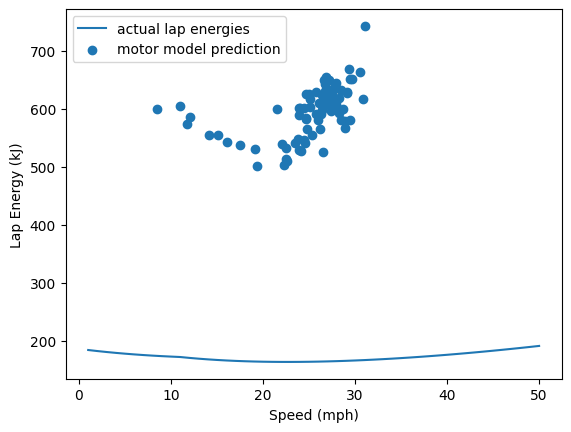

In [59]:
plt.plot(speeds_mph, np.array(avg_lap_energies_kj), label='actual lap energies')
plt.scatter(filtered_df["speed_avg_(mph)"], filtered_df["lap_energy_(kJ)"],  label='motor model prediction')
plt.legend(loc='best')
plt.ylabel('Lap Energy (kJ)')
plt.xlabel('Speed (mph)')
plt.show()